In [1]:
import pandas as pd #invocando pandas

In [2]:
notas = pd.read_csv('ratings.csv', sep=',')

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape #tamanho da tabela

(100836, 4)

In [5]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento'] #renomeado colunas

In [6]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
notas['nota'].unique() #verificar valores unicos na coluna

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
notas['nota'].value_counts() #verificar a qts de notas e quantidade de vezes que saiu

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
notas['nota'].mean()

3.501556983616962

<AxesSubplot:>

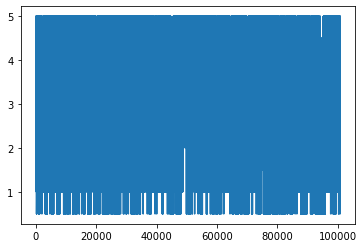

In [11]:
notas.nota.plot() #gráfico sem sentido

<AxesSubplot:ylabel='Frequency'>

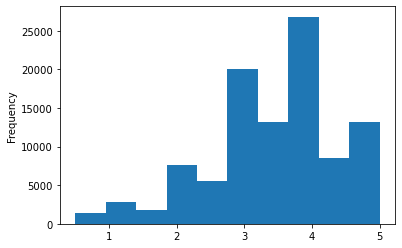

In [12]:
notas.nota.plot(kind = 'hist') #histograma melhor visual

In [13]:
print('Média', notas['nota'].mean()) #imprimindo a média e a mediana
print('Mediana', notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [14]:
notas.nota.describe() #medidas da coluna nota

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [15]:
import seaborn as sns #invocando seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

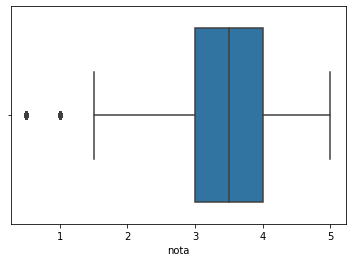

In [16]:
sns.boxplot(notas.nota) #chamando o boxplot

In [17]:
filmes = pd.read_csv('movies.csv', sep=',')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
filmes.columns = ['filmeId', 'titulo', 'generos']

In [19]:
notas.query('filmeId == 1') #pesquisando a Id do filme

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [20]:
notas.query('filmeId == 1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [21]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [22]:
medias_por_filme = notas.groupby('filmeId').mean().nota #ou [nota]

In [23]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

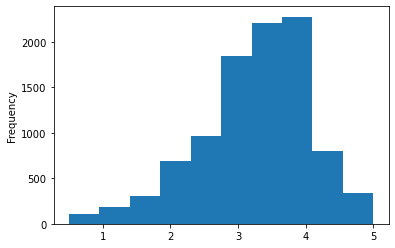

In [24]:
medias_por_filme.plot(kind='hist')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

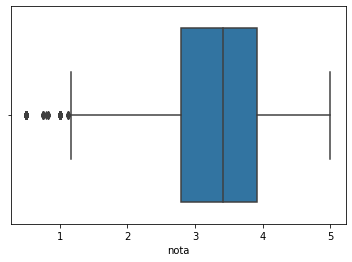

In [25]:
sns.boxplot(medias_por_filme)

In [26]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

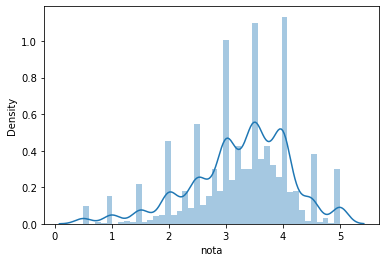

In [27]:
sns.distplot(medias_por_filme) #histograma do seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nota', ylabel='Density'>

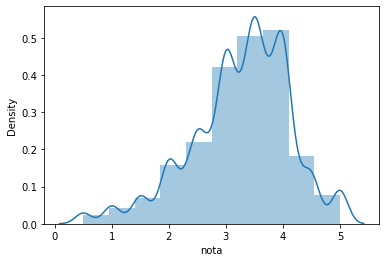

In [28]:
sns.distplot(medias_por_filme, bins=10) #histograma do seaborn usando parametro bins aproxima do que é visto no Pandas

In [29]:
import matplotlib.pyplot as plt #invocando matplotlib

Text(0.5, 1.0, 'Média de notas por filmes')

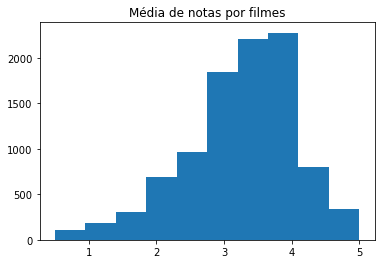

In [30]:
plt.hist(medias_por_filme)#histograma com matplotlib
plt.title('Média de notas por filmes')

<AxesSubplot:ylabel='nota'>

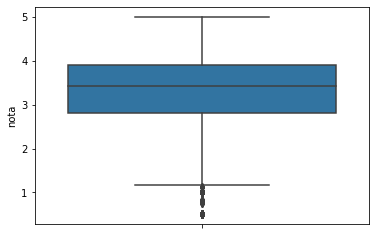

In [31]:
sns.boxplot(y=medias_por_filme) #plot na horizontal

<AxesSubplot:ylabel='nota'>

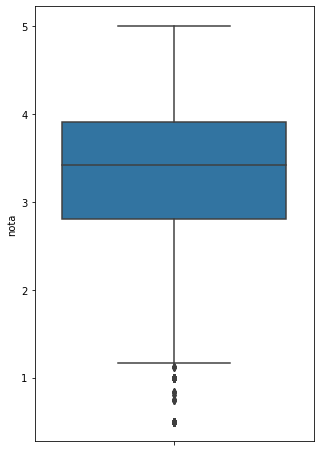

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))#tamanho do plot
sns.boxplot(y=medias_por_filme)